In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
from utils.LoRa import LoRa

import importlib
import utils.my_lora_utils as my_lora_utils
importlib.reload(my_lora_utils)
from utils.my_lora_utils import *

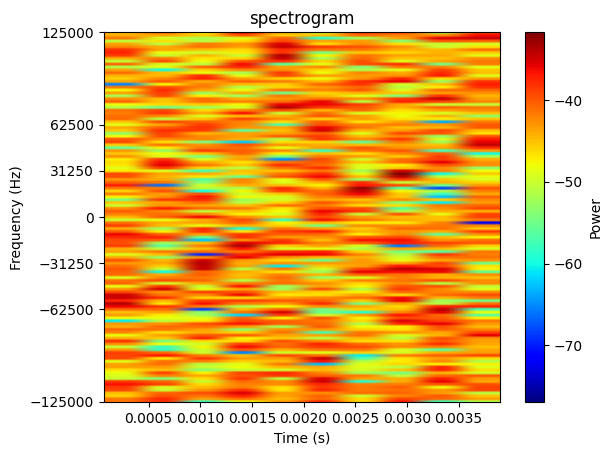

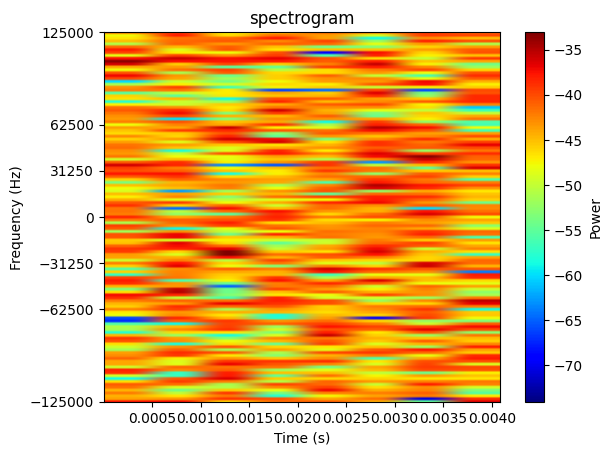

In [4]:
# ---- Example usage with your LoRa generator ----
sf = 9
bw = 125000
fs = 1_000_000
lora_init = LoRa(sf, bw)
x1 = lora_init.gen_symbol_fs(1, sf=sf, bw=bw, Fs=int(bw*8))  # you had Fs=int(bw*8)=1e6
snr = -18
x = lora_init.awgn_iq(x1,snr)

PLOT_SPECGRAM(x,512,"spectrogram",128,fs)
# LoRa Parameters
symbol_time = 2**sf / bw  # Symbol duration
# Time vector
t = np.arange(0, symbol_time, 1/fs)
y = generate_lora_chirp(1,t)
y_a = awgn(y,snr)

PLOT_SPECGRAM(y_a,512,"spectrogram",1,fs)